In [1]:
import tensorflow as tf
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Deep learning Lib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU,PReLU,ELU


In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [5]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
#  Now let's make the ANN!

In [7]:
# Initialising the ANN
classifier = Sequential()

In [8]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [9]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [11]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 3s 3ms/step - loss: 1.0012 - accuracy: 0.7589 - val_loss: 0.7365 - val_accuracy: 0.7641
Epoch 2/50
536/536 [==============================] - 1s 2ms/step - loss: 0.6744 - accuracy: 0.7611 - val_loss: 0.6684 - val_accuracy: 0.7134
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5974 - accuracy: 0.7462 - val_loss: 0.5702 - val_accuracy: 0.7588
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5353 - accuracy: 0.7718 - val_loss: 0.5506 - val_accuracy: 0.7785
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5130 - accuracy: 0.7891 - val_loss: 0.5190 - val_accuracy: 0.7864
Epoch 6/50
536/536 [==============================] - 1s 2ms/step - loss: 0.4969 - accuracy: 0.7962 - val_loss: 0.5060 - val_accuracy: 0.7891
Epoch 7/50
536/536 [==============================] - 1s 3ms/step - loss: 0.4838 - accuracy: 0.7988 - val_loss: 0.4990 - val_accuracy: 0.7914
Epoch 

In [13]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


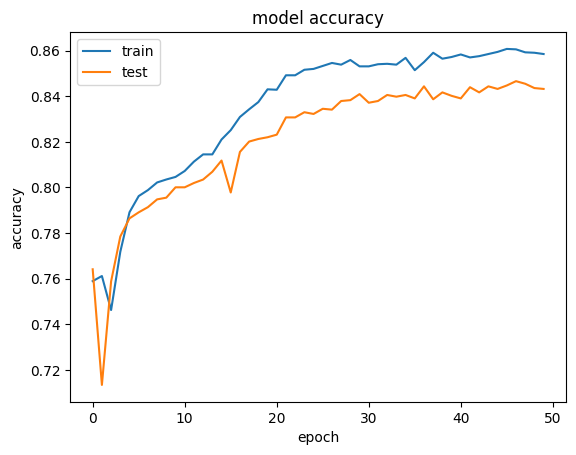

In [14]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

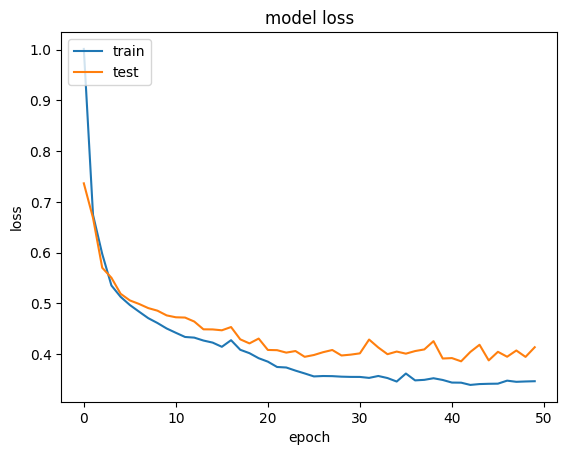

In [15]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1504,   91],
       [ 207,  198]])

In [18]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [19]:
score

0.851